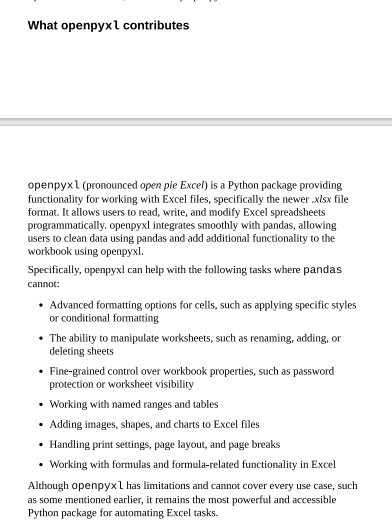

In [1]:
# Data manipulation and visualization
import pandas as pd
import seaborn as sns

# Excel file manipulation
from openpyxl import Workbook
from openpyxl.chart import BarChart, Reference
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.utils import get_column_letter
from openpyxl.worksheet.table import Table, TableStyleInfo
from openpyxl.styles import PatternFill

In [2]:
# Read in the data 
contestants = pd.read_excel(r'C:\Users\ADMIN\Desktop\Practice Datasets\Modern Data Analytics Datasets\Chapter 6\contestants.xlsx')

In [3]:
contestants.head()

,EMAIL,PRE,POST,SEX,EDUCATION,STUDY_HOURS
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


In [4]:
# Convert headers to all lowercase
contestants.columns = contestants.columns.str.lower()
contestants.head()

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
1,dbateman1@hao12@.com,462,458,Female,Bachelor's,14.8
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
3,mwison@@g.co,480,488,Female,Bachelor's,21.3
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2


<u>**Data cleaning areas**

* From this head () preview, it is clear that some emails are in the incorrect format.
* The education column has NaN values, these need to be removed.

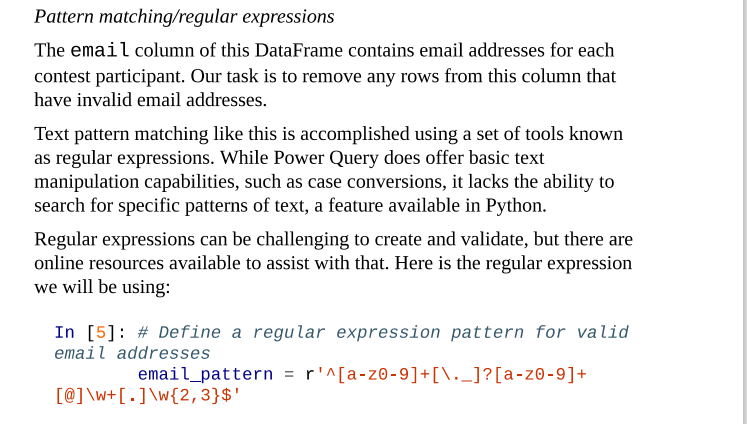

In [5]:
# Define a regular expression pattern for valid email addresses
email_pattern = r'^[a-z0-9]+[\._]?[a-z0-9]+[@]\w+[.]\w{2,3}$'  

In [6]:
# Creating a dataset called full_emails that contains only emails of our selected format

full_emails = contestants[contestants['email'].str.contains(email_pattern)]

In [17]:
full_emails.head()

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
4,jagostini4@wordpress.org,495,494,Female,NaN,26.2
5,kbridgnell5@webnode.com,484,503,Female,Bachelor's,31.6
6,abotham6@usda.gov,497,501,Female,Bachelor's,38.4


Let us check how many rows we lost by filtering. 

In [15]:
# Checking the dimensions of the original dataset
contestants.shape

(100, 6)

In [18]:
# Checking the dimensions of the new dataset
full_emails.shape

(82, 6)

We have lost 18 rows. 

<i>We can use the .info() method to get more information about a dataset.

In [19]:
full_emails.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        82 non-null     object 
 1   pre          82 non-null     int64  
 2   post         82 non-null     int64  
 3   sex          82 non-null     object 
 4   education    81 non-null     object 
 5   study_hours  82 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.5+ KB


<b>Notice that the education column has 81 non-null entries while the rest of the columns have 82 non-null entries.

One can wish to check, on average, which columns have the most Nan values.

In [22]:
full_emails.isnull().mean()

email          0.000000
pre            0.000000
post           0.000000
sex            0.000000
education      0.012195
study_hours    0.000000
dtype: float64

In [23]:
#Lets arrange these averages in descending order to find out the largest one.
full_emails.isnull().mean().sort_values(ascending=False)

education      0.012195
email          0.000000
pre            0.000000
post           0.000000
sex            0.000000
study_hours    0.000000
dtype: float64

We can see that if any, the rows that have missing values are not that many. This means that if we drop them, the loss of information will not be that significant.

In [24]:
complete_cases=full_emails.dropna()

In [25]:
complete_cases.head()

,email,pre,post,sex,education,study_hours
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2
5,kbridgnell5@webnode.com,484,503,Female,Bachelor's,31.6
6,abotham6@usda.gov,497,501,Female,Bachelor's,38.4
7,szeal7@pinterest.com,451,457,Male,Bachelor's,17.5


In [27]:
# Checking now if all 6 columns have all the same number of non-null values
complete_cases.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   email        81 non-null     object 
 1   pre          81 non-null     int64  
 2   post         81 non-null     int64  
 3   sex          81 non-null     object 
 4   education    81 non-null     object 
 5   study_hours  81 non-null     float64
dtypes: float64(1), int64(2), object(3)
memory usage: 4.4+ KB


All columns have the same number of non-null values.

In [28]:
# Creating a column that has ranked the values of the post column by percentiles
complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9536\2330375383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_cases['post_pct'] = complete_cases['post'].rank(pct=True)


In [29]:
complete_cases

,email,pre,post,sex,education,study_hours,post_pct
0,smehaffey0@creativecommons.org,485,494,Male,Bachelor's,20.0,0.679012
2,bbenham2@xrea.com,477,483,Female,Bachelor's,22.2,0.506173
5,kbridgnell5@webnode.com,484,503,Female,Bachelor's,31.6,0.882716
6,abotham6@usda.gov,497,501,Female,Bachelor's,38.4,0.827160
7,szeal7@pinterest.com,451,457,Male,Bachelor's,17.5,0.123457
...,...,...,...,...,...,...,...
94,bcoomes2m@cdbaby.com,445,448,Female,Bachelor's,15.0,0.086420
96,dashdown2o@technorati.com,496,494,Female,Master's,22.6,0.679012
97,cpeplay2p@woothemes.com,472,476,Female,Bachelor's,22.7,0.407407
98,dfaloon2q@google.es,494,501,Female,Bachelor's,29.3,0.827160


In [35]:
# Using descriptive statistics on the newly created column
complete_cases['post_pct'].describe() 

count    81.000000
mean      0.506173
std       0.290352
min       0.012346
25%       0.265432
50%       0.506173
75%       0.759259
max       1.000000
Name: post_pct, dtype: float64

In [40]:
# Applying describtive statistics to the entire dataset
complete_cases.describe()

,pre,post,study_hours,post_pct
count,81.000000,81.000000,81.000000,81.000000
mean,480.506173,481.012346,23.445679,0.506173
std,20.626514,23.037737,8.178142,0.290352
min,409.000000,398.000000,0.000000,0.012346
25%,470.000000,467.000000,18.700000,0.265432
50%,484.000000,483.000000,22.600000,0.506173
75%,494.000000,497.000000,29.000000,0.759259
max,521.000000,540.000000,42.800000,1.000000


#### Now we shall use openpyxl to create a styled summary worksheet.

First we will name the workbook and active worksheet.

In [41]:
# Create a new workbook and select the worksheet
wb = Workbook()

# Assign the active worksheet to ws
ws = wb.active

In [42]:
# Now we can populate any cell by qouting its Excel alphanumeric reference

ws['A1'] = "Average pre score"
ws['A2'] = "Average post score"

# Round output to two decimals
ws['B1'] = round(complete_cases['pre'].mean(), 2)  
ws['B2'] = round(complete_cases['post'].mean(), 2)

Inserting data in this way, is basically raw data insertion. So, for the long entries in A1 and A2, let's adjust the cell width.

In [43]:
ws.column_dimensions['A'].width = 16

## Inserting Excel Charts 

In [45]:
# Create a bar chart object
chart = BarChart()

# Define the data range (Since we are using A1 and A2 and B1 and B2: the columns and row will start at 1 and end at 2)
data = Reference(ws, min_col=2, min_row=1, max_col=2, max_row=2)

Next we will add data to our chart and add titles and axes

In [46]:
# Add data to the chart
chart.add_data(data)

# Set chart title, axis labels
chart.title = "Score Comparison"
chart.x_axis.title = "Score Type"
chart.y_axis.title = "Score Value"

In [ ]:
# Removing the chart legend
chart.legend= None

In [48]:
# We can add category labels 
# Set category names
categories = Reference(ws, min_col=1, min_row=1, max_row=2)

chart.set_categories(categories)

Now that the chart is formatted, we will add the chart to a specific place in the workbook.

In [49]:
# Add the chart to a specific location on the worksheet
ws.add_chart(chart, "D1")

Next, to our excel sheet, lets show them what Python also can do by adding a plot from Python😎😎😎.

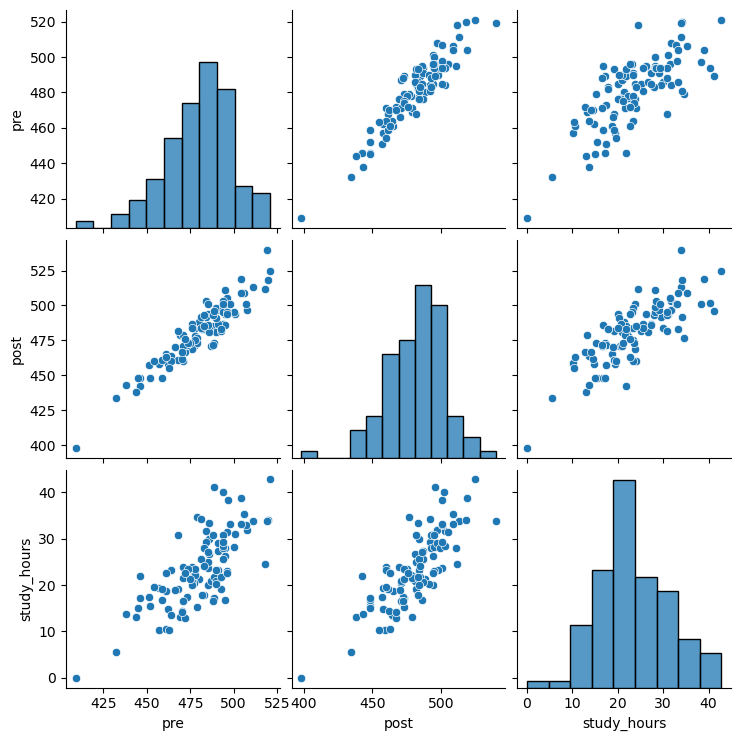

In [52]:
# Plotting a pair-grid of three variables
sns.pairplot(contestants[['pre', 'post', 'study_hours']])

We can as well filter by sex

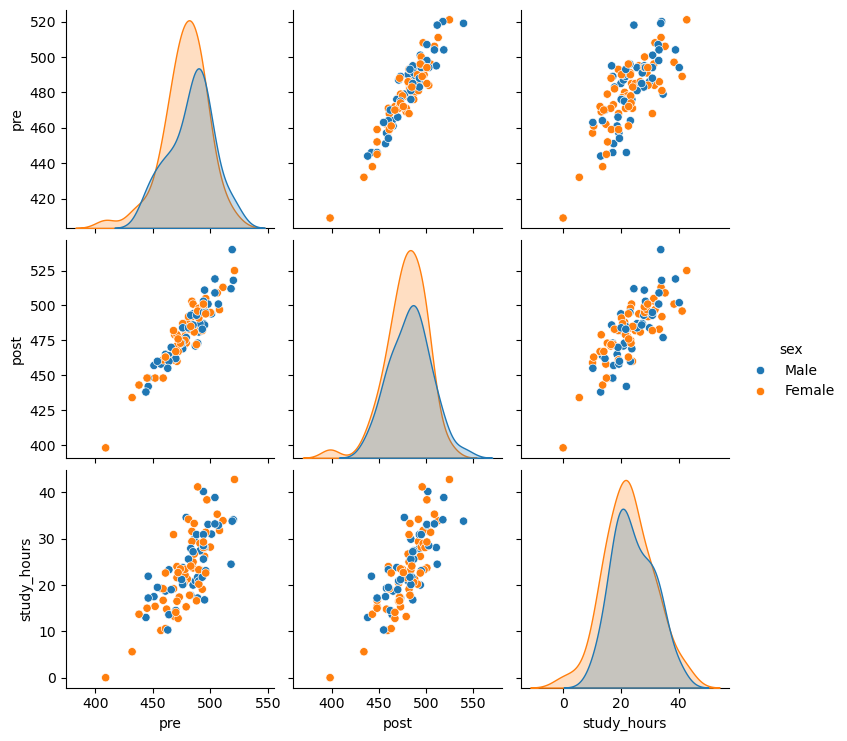

In [54]:
# To filter by sex , sex must be among the varaibles in the list
sns.pairplot(contestants[['pre', 'post', 'study_hours','sex']],hue='sex')

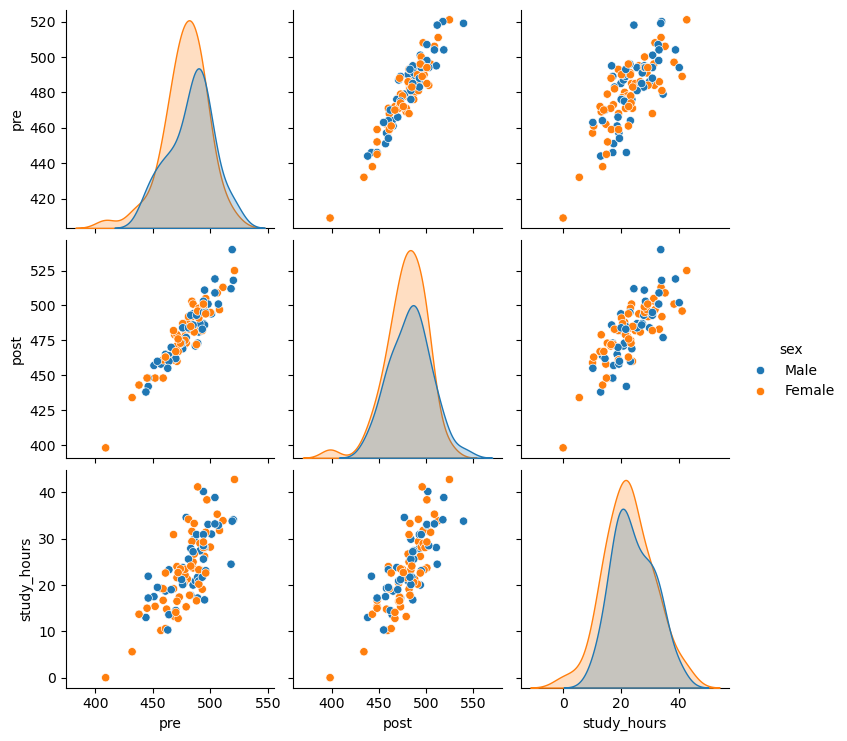

In [57]:
# Naming the plot
sns_plot=sns.pairplot(contestants[['pre', 'post', 'study_hours','sex']],hue='sex')

To place a static image of the above pairplot into the workbook, first, we must save the image to a directory/location then specifing where to place it into the workbook.

In [75]:
# Save pairplot to location as an image
sns_plot.savefig(r'C:\Users\ADMIN\Desktop\Practice Datasets\Modern Data Analytics Datasets\Chapter 6\pairplot.png')

In [76]:
# Load saved image into the worksheet
image = Image(r'C:\Users\ADMIN\Desktop\Practice Datasets\Modern Data Analytics Datasets\Chapter 6\pairplot.png')
ws.add_image(image, 'A20')

## Creating the data worksheet 

The summary sheet is done. Next is to create a sheet that has all the data.

In [77]:
ws2 = wb.create_sheet(title='data')

Next we will add in all the data row by row through a for loop.

In [78]:
for row in dataframe_to_rows(complete_cases, index=False, header=True):
    ws2.append(row)

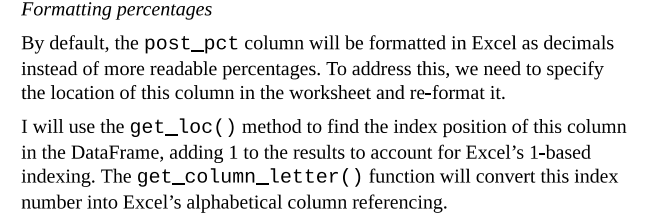

<i>Recall, Python starts indexing at 0 while Excel starts at 1. Thus, why important to add 1.

In [79]:
post_pct_loc = complete_cases.columns.get_loc('post_pct') + 1
post_pct_col = get_column_letter(post_pct_loc) 
post_pct_col

'G'

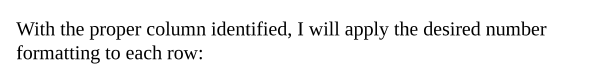

In [80]:
# Creating the desired format
number_format = '0.0%'

# Applying this format to every row in column G
for cell in ws2[post_pct_col]:
    cell.number_format = number_format

In Excel, it is common practice to convert data into tables. Let us attempt that.

In [ ]:
# Specify desired table formatting
style = TableStyleInfo(name='TableStyleMedium9', showRowStripes=True)

# Name and identify range of table
table = Table(displayName='contestants', 
              ref='A1:' + get_column_letter(ws2.max_column) + 
                  str(ws2.max_row))
              
# Apply styling and insert in worksheet 
table.tableStyleInfo = style
ws2.add_table(table)

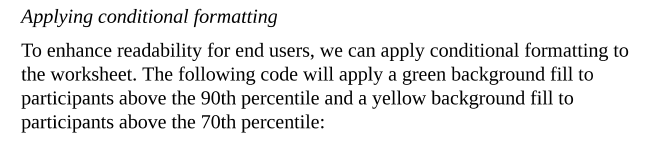

In [72]:
# Define conditional formatting style
green_fill = PatternFill(start_color="B9E8A2", 
                         end_color="B9E8A2", fill_type="solid")
yellow_fill = PatternFill(start_color="FFF9D4", 
                          end_color="FFF9D4", fill_type="solid")

# Loop through data table and conditonally apply formatting
for row in ws2.iter_rows(min_row=2, min_col=1, 
                         max_col=len(complete_cases.columns)):
    # Convert index to 0-based indexing
    post_pct = row[post_pct_loc - 1].value 
    if post_pct > .9:
        for cell in row:
            cell.fill = green_fill
    elif post_pct > .7:
        for cell in row:
            cell.fill = yellow_fill

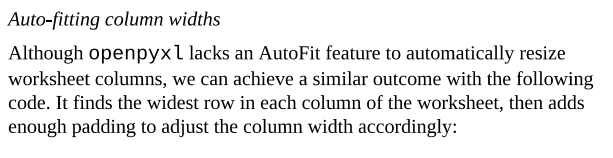

In [73]:
for column in ws2.columns:
    max_length = 0
    column_letter = column[0].column_letter
    for cell in column:
        try:
            if len(str(cell.value)) > max_length:
                max_length = len(cell.value)
        except:
            pass
    adjusted_width = (max_length + 2) * 1.2
    ws2.column_dimensions[column_letter].width = adjusted_width

In [83]:
wb.save(r'C:\Users\ADMIN\Desktop\Practice Datasets\Modern Data Analytics Datasets\Chapter 6\ch_12_output.xlsx')